# Imports

In [29]:

import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
from pydantic.v1 import BaseSettings
from pandas_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle
import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import LinearSVC, SVC
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score


# Load Dataset

In [30]:
df = pd.read_table('../data/raw/cardio_train.csv', delimiter=';')
df.dataframename = 'cardio_train.csv'

# Analise dos dados

In [31]:
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [33]:
df.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# tranformações de colunas

In [42]:
#transformando a idade em anos

df['years'] = np.floor(df['age']/365).astype('int')

df['age'] = df['years']

df = df.drop('years', axis=1)


In [43]:
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,0,1,156,56.0,100,60,1,1,0,0,0,0


In [37]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# Análise estatística dos dados

In [38]:
height_gender = df.groupby('gender')['height'].mean() 
weight_gender = df.groupby('gender')['weight'].mean() 
alco_gender = df.groupby('gender')['alco'].sum() 
print(height_gender)
print(weight_gender)
print(alco_gender)


gender
1    161.355612
2    169.947895
Name: height, dtype: float64
gender
1    72.565605
2    77.257307
Name: weight, dtype: float64
gender
1    1161
2    2603
Name: alco, dtype: int64


KeyError: 0

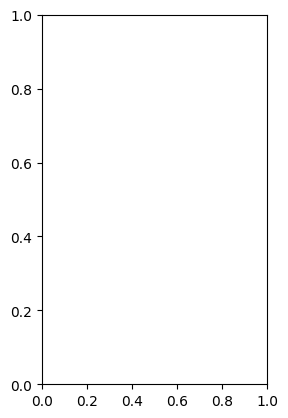

In [39]:
plt.subplot(1, 2, 1)
sns.barplot(height_gender)
plt.title('Altura média')
plt.xticks([0, 1], ['Mulher', 'Homem'])
plt.xlabel('')


plt.subplot(1,2, 2)
sns.barplot(weight_gender)
plt.title('Peso médio')
plt.xticks([0, 1], ['Mulher', 'Homem'])
plt.xlabel('')
plt.tight_layout()
plt.show()

### homens são mais altos que as mulheres e pesam mais. Na somatória, há mais homens que bebem.
---

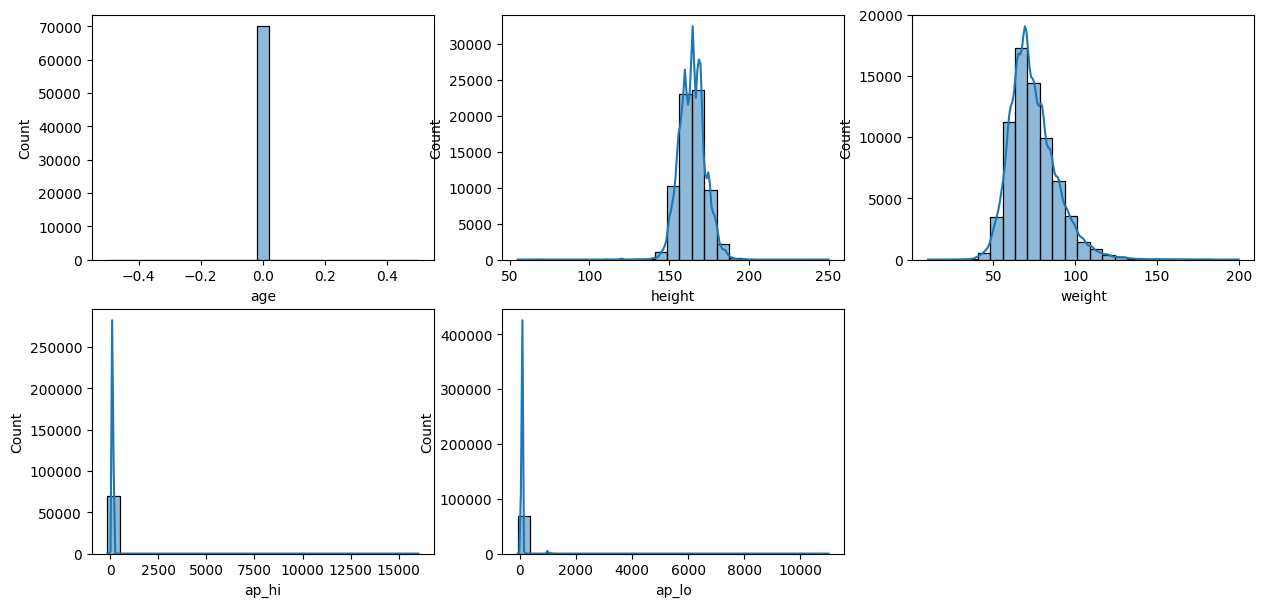

In [44]:
features_num = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(15, 7))
for i, feature in enumerate(features_num):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], bins=25, kde=True)
    
plt.show()

In [45]:
# Definindo os limites dos outliers para cada coluna
outlier_limits = {
    'height': (df['height'].quantile(0.015), df['height'].quantile(0.985)),
    'weight': (df['weight'].quantile(0.015), df['weight'].quantile(0.985)),
    'ap_hi': (df['ap_hi'].quantile(0.015), df['ap_hi'].quantile(0.985)),
    'ap_lo': (df['ap_lo'].quantile(0.015), df['ap_lo'].quantile(0.985))
}

# Contagem de outliers
outlier_count = {}
for column, limits in outlier_limits.items():
    outliers = df[(df[column] < limits[0]) | (df[column] > limits[1])]
    outlier_count[column] = len(outliers)

# Exibindo o resultado
print("Contagem de outliers por coluna:")
for column, count in outlier_count.items():
    print(f"{column}: {count} outliers")

Contagem de outliers por coluna:
height: 1816 outliers
weight: 1975 outliers
ap_hi: 690 outliers
ap_lo: 1225 outliers


In [46]:
def remove_outliers (cols):
    for col in cols:
        df.drop(df[(df[col] > df[col].quantile(0.985)) |
                (df[col] < df[col].quantile(0.025))].index,inplace=True)
    return df

In [47]:
cols_with_outliers = ['height', 'weight', 'ap_hi', 'ap_lo']
df = remove_outliers(cols_with_outliers)

In [48]:
# Definindo os limites dos outliers para cada coluna
outlier_limits = {
    'height': (df['height'].quantile(0.015), df['height'].quantile(0.985)),
    'weight': (df['weight'].quantile(0.015), df['weight'].quantile(0.985)),
    'ap_hi': (df['ap_hi'].quantile(0.015), df['ap_hi'].quantile(0.985)),
    'ap_lo': (df['ap_lo'].quantile(0.015), df['ap_lo'].quantile(0.985))
}

# Contagem de outliers
outlier_count = {}
for column, limits in outlier_limits.items():
    outliers = df[(df[column] < limits[0]) | (df[column] > limits[1])]
    outlier_count[column] = len(outliers)

# Exibindo o resultado
print("Contagem de outliers por coluna:")
for column, count in outlier_count.items():
    print(f"{column}: {count} outliers")

Contagem de outliers por coluna:
height: 1301 outliers
weight: 1646 outliers
ap_hi: 621 outliers
ap_lo: 274 outliers


In [49]:
df.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62043.000000,62043.0,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000
mean,49908.236401,0.0,1.353062,164.704608,73.982463,126.373048,81.321632,1.358139,1.222588,0.087246,0.052963,0.803588,0.495334
std,28834.017689,0.0,0.477926,6.978416,12.211198,14.451855,8.515973,0.675552,0.569500,0.282197,0.223962,0.397287,0.499982
min,0.000000,0.0,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24902.000000,0.0,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49899.000000,0.0,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74752.000000,0.0,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,0.0,2.000000,182.000000,112.000000,170.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Criação de colunas

In [50]:
#criando a coluna de IMC = BMI = Body Max Index (Indice de Massa corporal)

df['bmi'] = df['weight']/(df['height']/100)**2

#criando a coluna PP = pressão de pulso = pulse pressure (diferença entre pressão sistólica e diastólica)

df.sample(10)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
9474,13501,0,1,159,55.0,140,90,1,1,0,0,1,1,21.755469
8886,12674,0,1,167,78.0,100,60,3,3,0,0,1,0,27.968016
62237,88870,0,1,157,100.0,120,80,1,1,0,0,1,0,40.569597
15389,21991,0,2,165,80.0,130,80,3,1,1,1,0,1,29.384757
1766,2497,0,1,166,68.0,100,60,1,1,0,0,1,1,24.677021
22993,32852,0,1,160,63.0,110,70,1,2,0,0,0,1,24.609375
44791,63963,0,2,170,78.0,120,80,1,1,0,0,1,0,26.989619
14113,20142,0,1,162,68.0,110,70,1,1,0,0,1,0,25.910684
33347,47647,0,2,176,93.0,130,80,3,1,0,0,1,1,30.023244
64240,91685,0,2,172,85.0,120,80,1,1,0,0,1,0,28.731747


In [51]:
df.to_csv('../data/processed/df_pronto.csv', index=False)
# df.to_excel('../data/processed/df_pronto.xlsx', index=False)

In [52]:
df.drop(columns=['id'], inplace=True)

In [53]:
#definindo o estilo de todos os gráficos
plt.style.use("bmh")

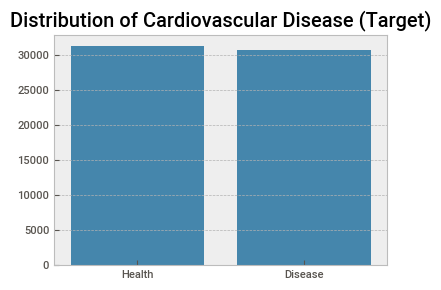

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=df, x='cardio')
plt.title('Distribution of Cardiovascular Disease (Target)')
ax.set_xticks([0,1])
ax.set_xticklabels(['Health', 'Disease'])
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

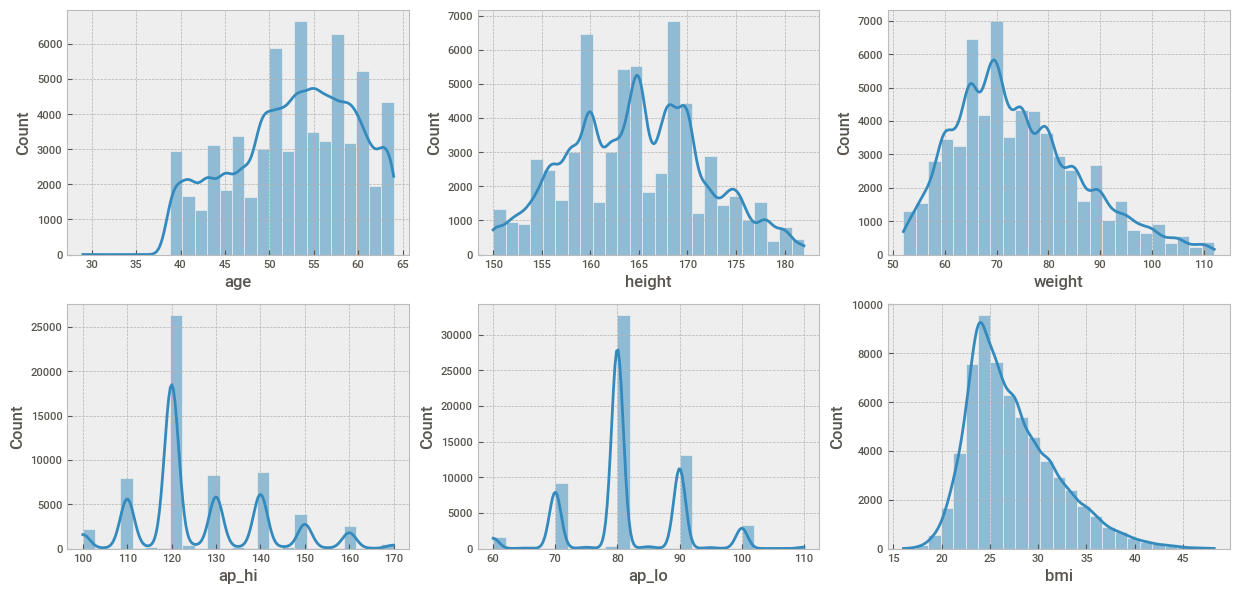

In [ ]:
features_num = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

plt.figure(figsize=(15, 7))
for i, feature in enumerate(features_num):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], bins=25, kde=True)
    
plt.show()

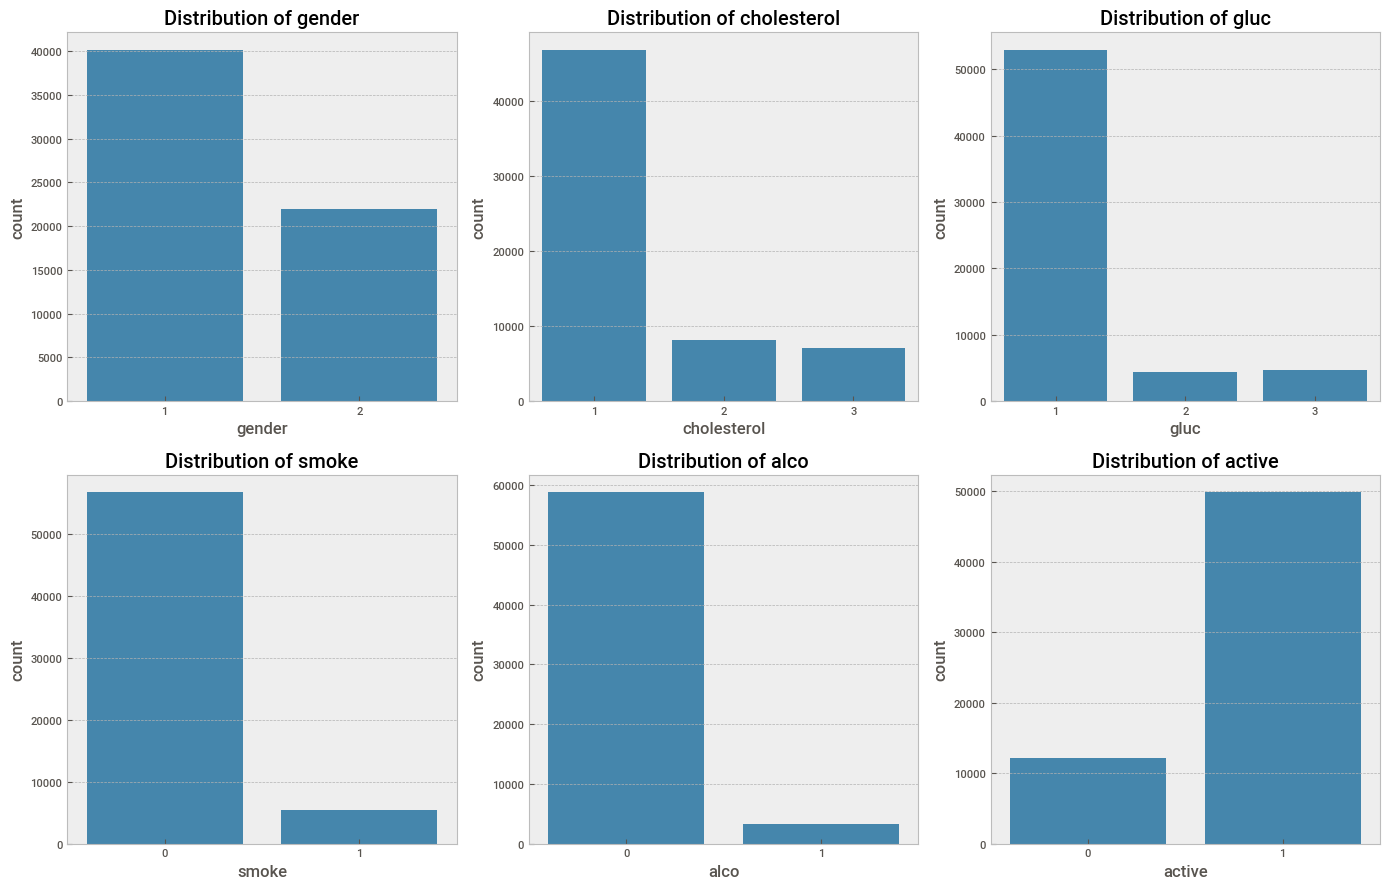

In [ ]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
plt.figure(figsize=(14, 9))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()   

### interessante ver a quantidade de individuos que relataram praticar atividade física 'acometidos' frente aos que não tem doença cardíaca.
___

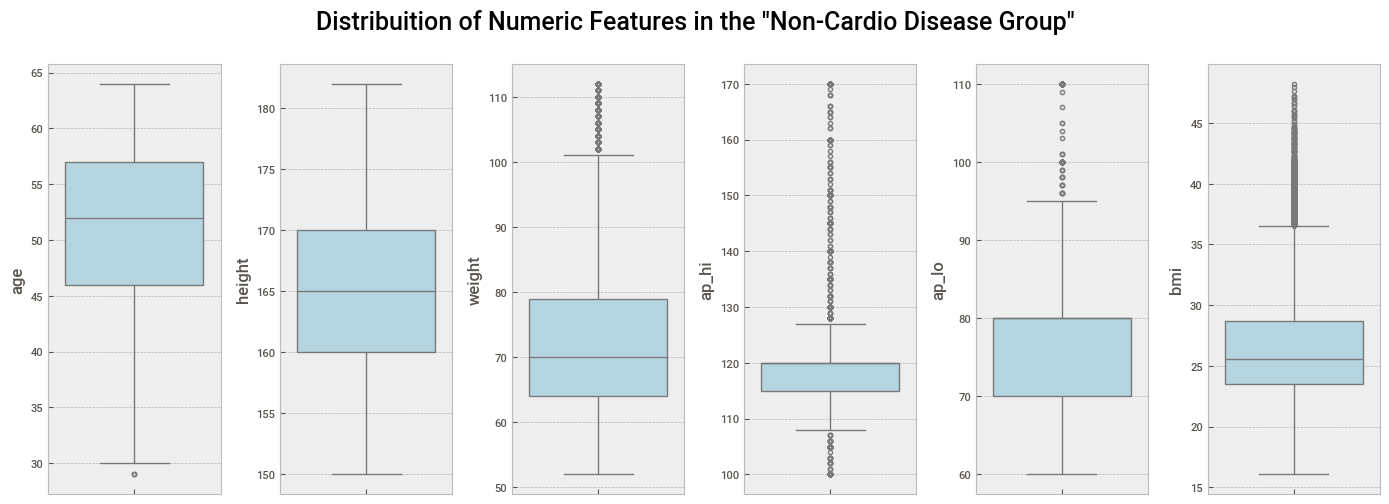

In [ ]:

aux = df[df['cardio'] == 0]
plt.figure(figsize=(14, 5))
for i, feature in enumerate(features_num):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y=aux[feature], color='lightblue', orient='v')
    
plt.suptitle('Distribuition of Numeric Features in the "Non-Cardio Disease Group"', y=1, fontsize=18)
plt.tight_layout()
plt.show()

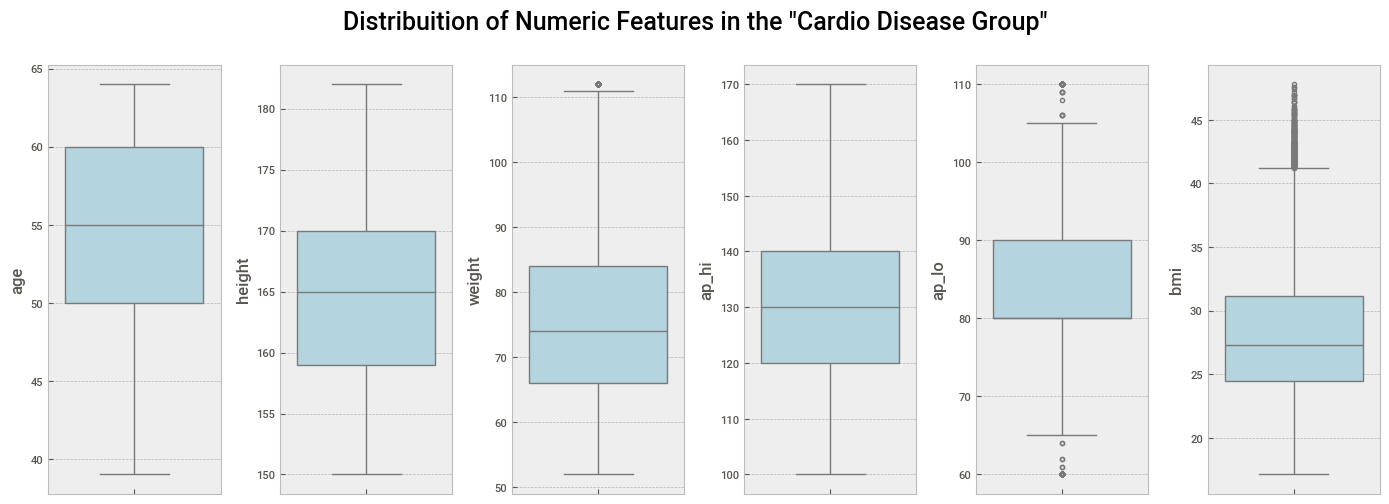

In [ ]:
plt.figure(figsize=(14, 5))
aux = df[df['cardio'] == 1]
for i, feature in enumerate(features_num):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y=aux[feature], color='lightblue', orient='v')
    
plt.suptitle('Distribuition of Numeric Features in the "Cardio Disease Group"', y=1, fontsize=18)
plt.tight_layout()
plt.show()

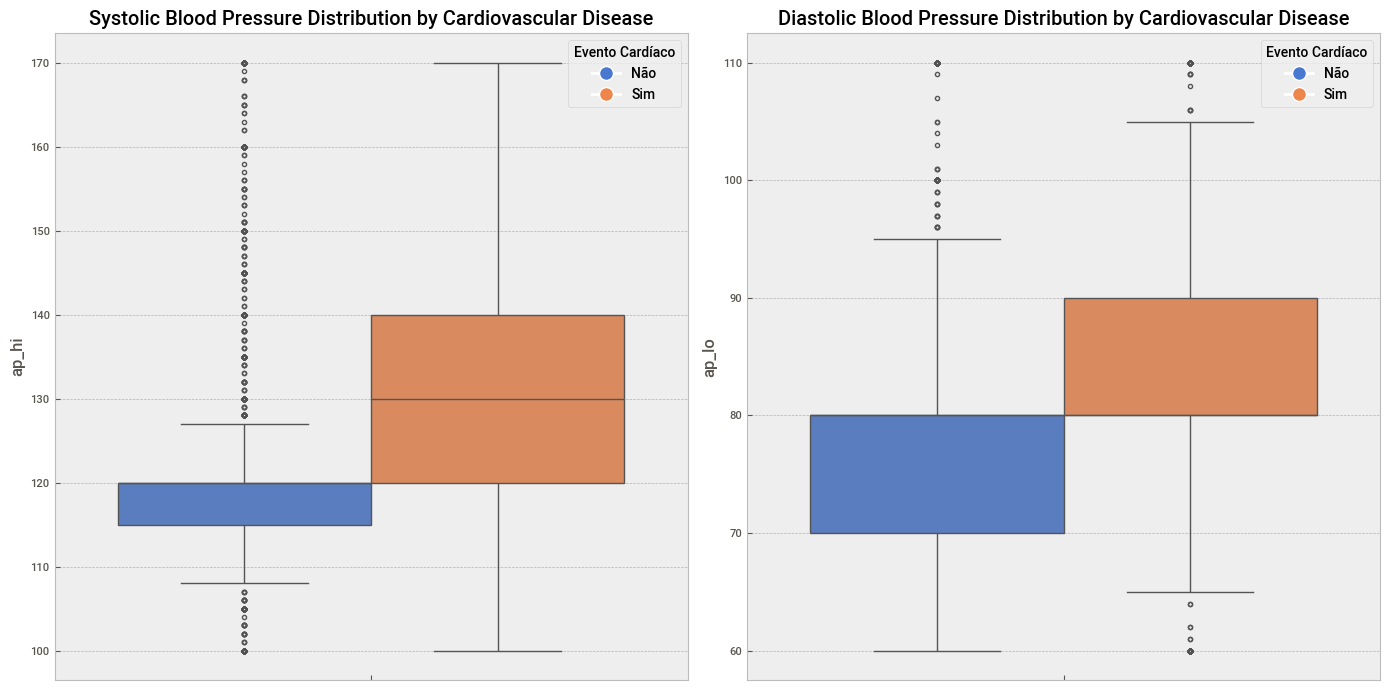

In [ ]:
plt.figure(figsize=(14, 7))  


plt.subplot(1, 2, 1) 
ax = sns.boxplot(data=df, hue='cardio', y='ap_hi', palette='muted')
# Ajuste manual da legenda
handles, labels = ax.get_legend_handles_labels()
colors = sns.color_palette('muted', len(labels))

# Mapeamento de rótulos
label_map = {'0': 'Não', '1': 'Sim'}  

# Criando legenda personalizada
custom_labels = [label_map.get(label, label) for label in labels]
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(custom_handles, custom_labels, title='Evento Cardíaco')
plt.title('Systolic Blood Pressure Distribution by Cardiovascular Disease')


plt.subplot(1, 2, 2)
ax = sns.boxplot(data=df, hue='cardio', y='ap_lo', palette='muted')
# Ajuste manual da legenda
handles, labels = ax.get_legend_handles_labels()
colors = sns.color_palette('muted', len(labels))

# Mapeamento de rótulos
label_map = {'0': 'Não', '1': 'Sim'}  

# Criando legenda personalizada
custom_labels = [label_map.get(label, label) for label in labels]
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(custom_handles, custom_labels, title='Evento Cardíaco')
plt.title('Diastolic Blood Pressure Distribution by Cardiovascular Disease')

plt.tight_layout()
plt.show()


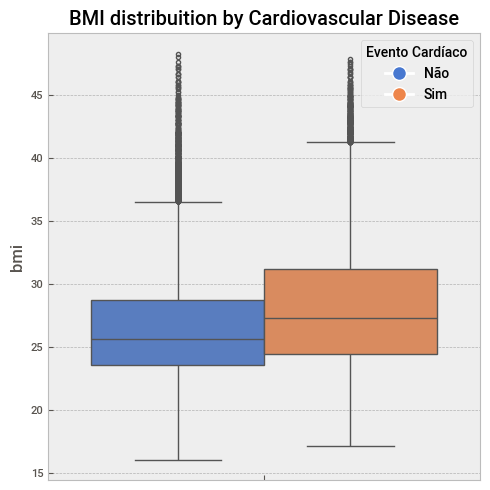

In [ ]:
plt.figure(figsize=(5, 5))  
ax = sns.boxplot(data=df, hue='cardio', y='bmi', palette='muted')
# Ajuste manual da legenda
handles, labels = ax.get_legend_handles_labels()
colors = sns.color_palette('muted', len(labels))

# Mapeamento de rótulos
label_map = {'0': 'Não', '1': 'Sim'}  

# Criando legenda personalizada
custom_labels = [label_map.get(label, label) for label in labels]
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(custom_handles, custom_labels, title='Evento Cardíaco')
plt.title('BMI distribuition by Cardiovascular Disease')
plt.tight_layout()
plt.show()


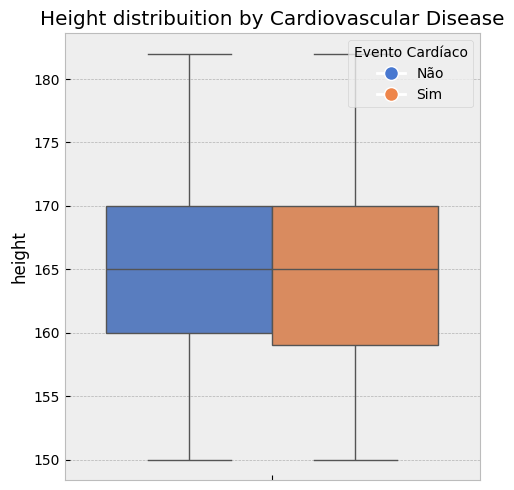

In [ ]:
plt.figure(figsize=(5, 5))  



ax = sns.boxplot(data=df, hue='cardio', y='height', palette='muted')
# Ajuste manual da legenda
handles, labels = ax.get_legend_handles_labels()
colors = sns.color_palette('muted', len(labels))

# Mapeamento de rótulos
label_map = {'0': 'Não', '1': 'Sim'}  

# Criando legenda personalizada
custom_labels = [label_map.get(label, label) for label in labels]
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(custom_handles, custom_labels, title='Evento Cardíaco', loc='upper right' )
plt.title('Height distribuition by Cardiovascular Disease')
plt.tight_layout()
plt.show()


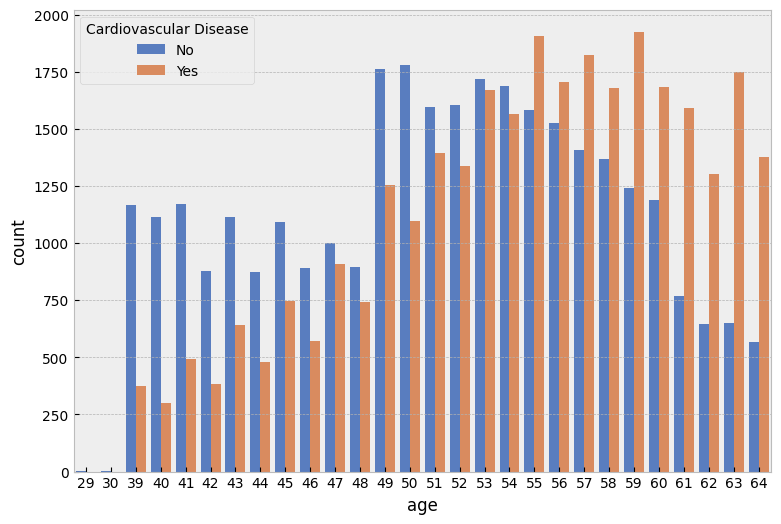

In [ ]:
rcParams['figure.figsize'] = 9, 6
sns.countplot(x='age', hue='cardio', data = df, palette="muted")
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])


### uma demonstração clara da influencia da idade no evento

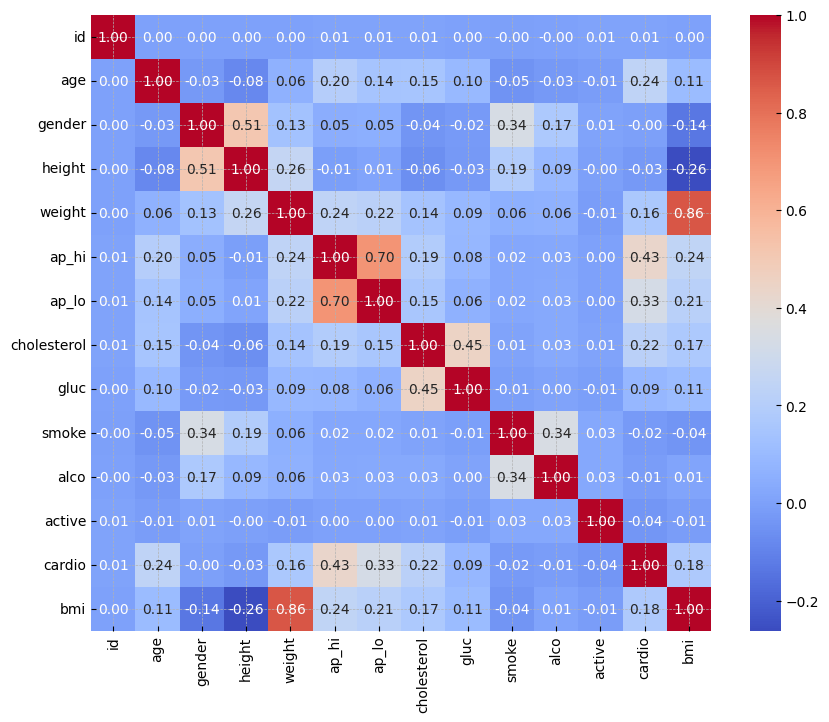

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Analise bivariada


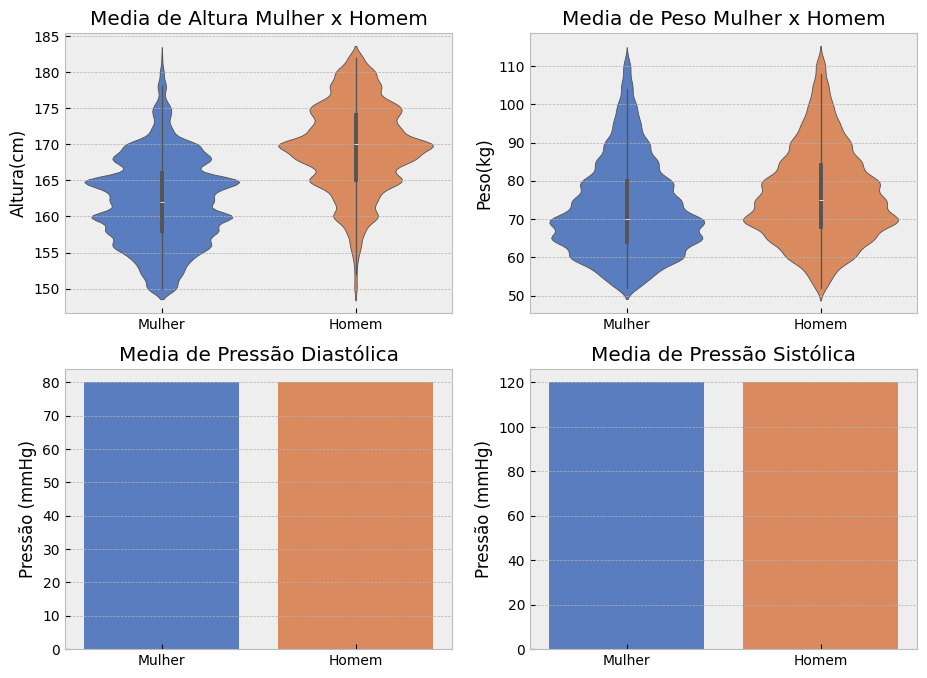

In [ ]:
plt.figure(figsize=(11, 8))
plt.subplot( 2, 2, 1 )
ax = sns.violinplot(x='gender', y='height', data=df, palette='muted')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Mulher', 'Homem'])
ax.set_xlabel('')
ax.set_ylabel('Altura(cm)')
ax.set_title('Media de Altura Mulher x Homem')

plt.subplot( 2, 2, 2 )
ax = sns.violinplot(x='gender', y='weight', data=df, palette='muted')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Mulher', 'Homem'])
ax.set_xlabel('')
ax.set_ylabel('Peso(kg)')
ax.set_title('Media de Peso Mulher x Homem')

plt.subplot( 2, 2, 3 )
ax = sns.barplot(x='gender', y='ap_lo', data=df, estimator=np.median, palette='muted')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Mulher', 'Homem'])
ax.set_xlabel('')
ax.set_ylabel('Pressão (mmHg)')
ax.set_title('Media de Pressão Diastólica')

plt.subplot( 2, 2, 4 )
ax = sns.barplot(x='gender', y='ap_hi', data=df, estimator=np.median, palette='muted')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Mulher', 'Homem'])
ax.set_xlabel('')
ax.set_ylabel('Pressão (mmHg)')
ax.set_title('Media de Pressão Sistólica')
plt.show()

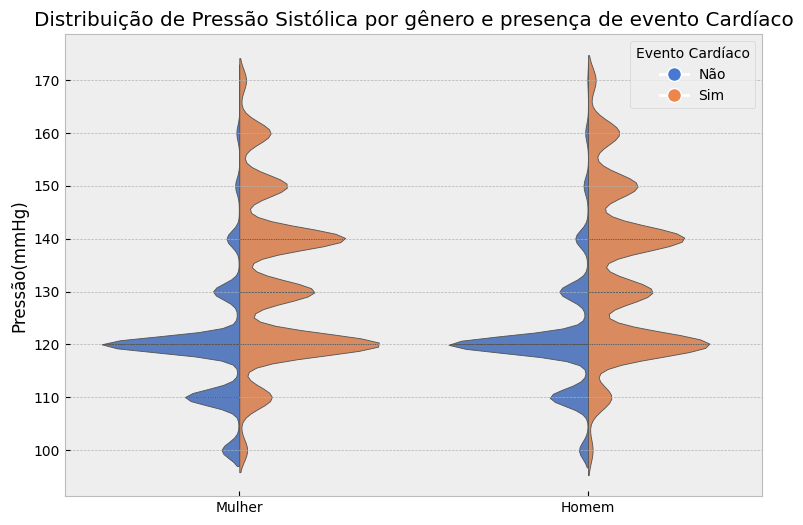

In [ ]:

ax = sns.violinplot(data=df, x="gender", y="ap_hi", hue="cardio",
               split=True, inner="quart", fill=True, palette='muted'
               )
# Ajuste manual da legenda
handles, labels = ax.get_legend_handles_labels()
colors = sns.color_palette('muted', len(labels))

# Mapeamento de rótulos
label_map = {'0': 'Não', '1': 'Sim'}  

# Criando legenda personalizada
custom_labels = [label_map.get(label, label) for label in labels]
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]

ax.legend(custom_handles, custom_labels, title='Evento Cardíaco')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Mulher', 'Homem'])
ax.set_xlabel('')
ax.set_ylabel('Pressão(mmHg)')
ax.set_title('Distribuição de Pressão Sistólica por gênero e presença de evento Cardíaco')
plt.show()

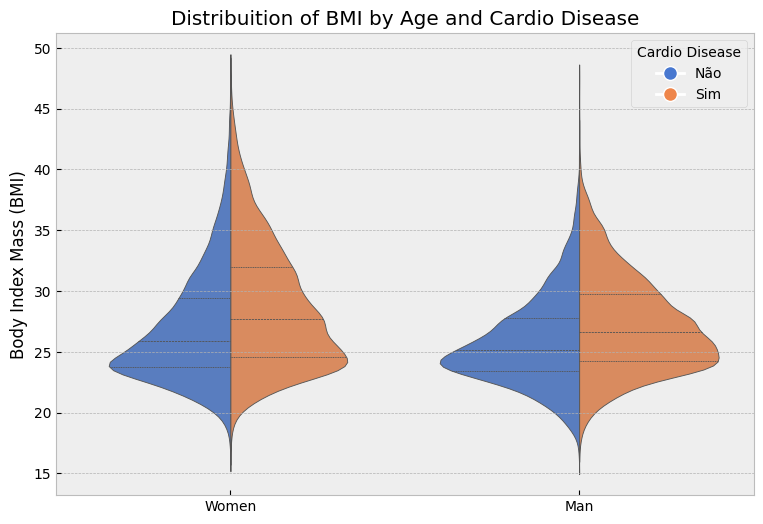

In [ ]:
ax = sns.violinplot(data=df, x="gender", y="bmi", hue="cardio",
               split=True, inner="quart", fill=True, palette='muted'
               )
# Ajuste manual da legenda
handles, labels = ax.get_legend_handles_labels()
colors = sns.color_palette('muted', len(labels))

# Mapeamento de rótulos
label_map = {'0': 'Não', '1': 'Sim'}  

# Criando legenda personalizada
custom_labels = [label_map.get(label, label) for label in labels]
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]

ax.legend(custom_handles, custom_labels, title='Cardio Disease')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Women', 'Man'])
ax.set_xlabel('')
ax.set_ylabel('Body Index Mass (BMI)')
ax.set_title('Distribuition of BMI by Age and Cardio Disease')
plt.show()

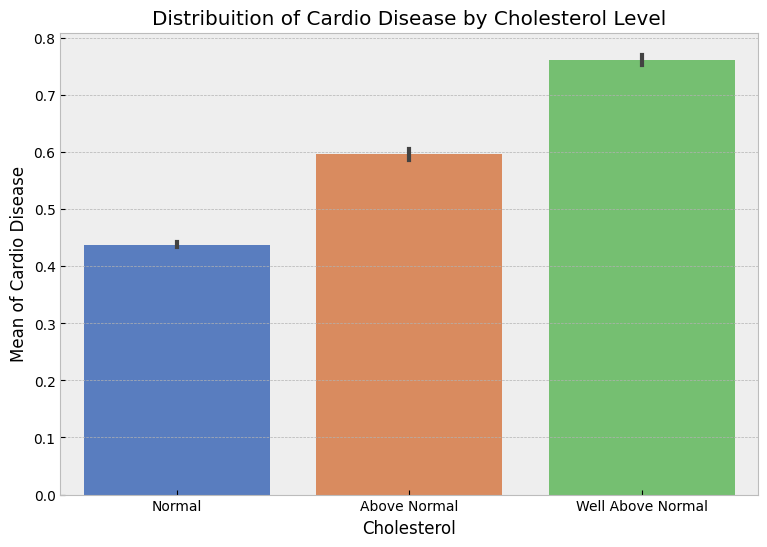

In [ ]:

ax = sns.barplot(x='cholesterol', y='cardio', data=df, palette='muted')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Normal', 'Above Normal', 'Well Above Normal'])
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Mean of Cardio Disease')
ax.set_title('Distribuition of Cardio Disease by Cholesterol Level')
plt.show()

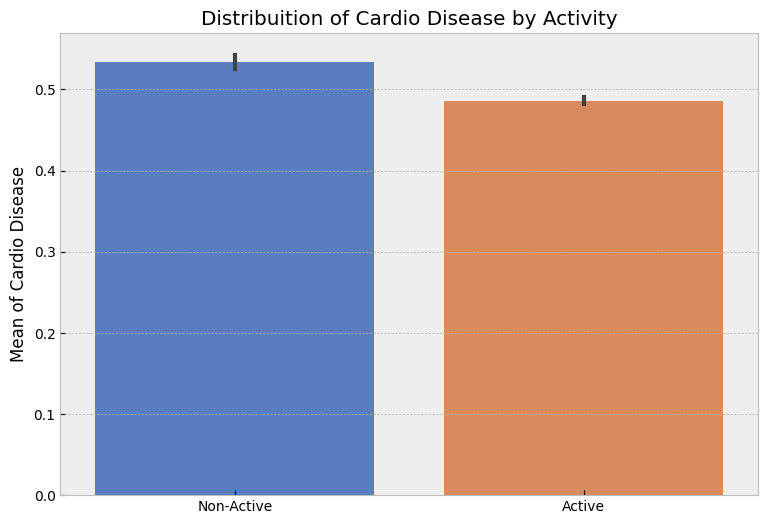

In [ ]:
ax = sns.barplot(x='active', y='cardio', data=df, palette='muted')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Active', 'Active'])
ax.set_xlabel('')
ax.set_ylabel('Mean of Cardio Disease')
ax.set_title('Distribuition of Cardio Disease by Activity')
plt.show()


In [ ]:
df.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000,62043.000000
mean,49908.236401,52.855858,1.353062,164.704608,73.982463,126.373048,81.321632,1.358139,1.222588,0.087246,0.052963,0.803588,0.495334,27.323912
std,28834.017689,6.745260,0.477926,6.978416,12.211198,14.451855,8.515973,0.675552,0.569500,0.282197,0.223962,0.397287,0.499982,4.585337
min,0.000000,29.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.049383
25%,24902.000000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875433
50%,49899.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,74752.000000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.023244
max,99999.000000,64.000000,2.000000,182.000000,112.000000,170.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.243498


In [ ]:
df.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
67331,96141,57,2,169,98.0,130,80,1,1,0,0,1,0,34.312524
46001,65701,42,2,165,70.0,120,80,1,1,0,0,1,1,25.711662
3108,4383,58,1,169,62.0,120,80,3,3,0,0,1,1,21.707923
560,806,45,1,153,63.0,100,70,1,1,0,0,1,0,26.912726
24409,34870,59,1,168,75.0,120,80,1,1,0,0,1,0,26.573129
23586,33708,64,1,160,78.0,140,90,1,1,0,0,1,0,30.468750
67217,95971,53,1,157,93.0,140,80,3,1,0,0,1,0,37.729725
54553,77826,49,1,164,73.0,110,70,1,1,0,0,1,0,27.141582
33356,47657,62,1,158,74.0,140,90,3,3,0,0,1,0,29.642685
39530,56480,55,1,151,70.0,130,80,1,1,0,0,1,0,30.700408


# Preparando para o modelo

In [55]:
df2 = df.copy()

df2.shape

(62043, 13)

In [57]:
# dropando a coluna target ('cardio') e o id que não representa importância ao modelo.
x = df2.drop(['cardio'], axis=1)

# y será apenas o target
y = df2['cardio']



In [58]:
# fazendo a divisão entre treino e test
# 25% para teste e o restante para treino.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


# Rescaling

In [59]:
#Rescaling usando robust scaler
scaler = RobustScaler().set_output(transform='pandas')

scaler.fit(x_train)
scaler.fit(x_test)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
20378,0.0,1.0,1.1,0.8750,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.226135
41914,0.0,0.0,0.0,-0.4375,0.0,-0.1,0.0,0.0,0.0,0.0,-1.0,-0.402902
27994,0.0,0.0,-0.8,-1.0625,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.655570
50840,0.0,0.0,-0.4,-1.1875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.957531
69041,0.0,0.0,-1.5,-0.8750,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.095096
28451,0.0,1.0,0.5,0.2500,2.0,1.0,0.0,0.0,0.0,0.0,-1.0,-0.011005
55779,0.0,1.0,0.5,-1.1250,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.242519
4704,0.0,0.0,-0.5,0.5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.790179
14527,0.0,0.0,0.0,-0.4375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.402902
22297,0.0,1.0,0.3,-0.4375,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,-0.539614


In [ ]:
#exportando o robust scaler

with open('../models/robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

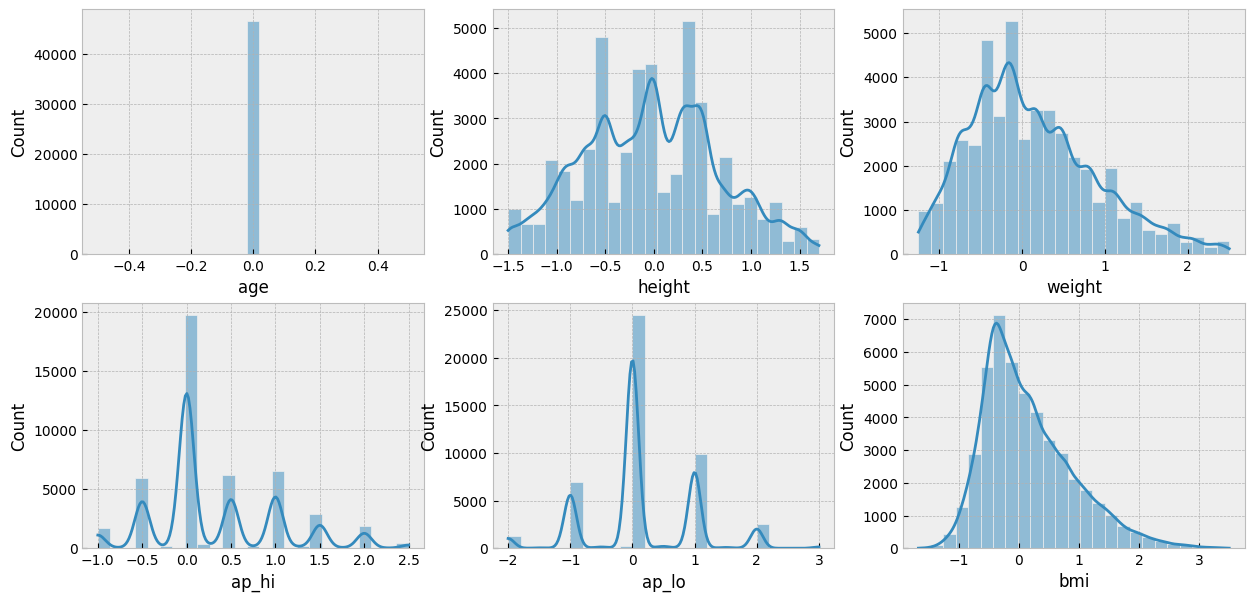

In [60]:
features_num = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

plt.figure(figsize=(15, 7))
for i, feature in enumerate(features_num):
    plt.subplot(2, 3, i+1)
    sns.histplot(x_train[feature], bins=25, kde=True)
    
plt.show()

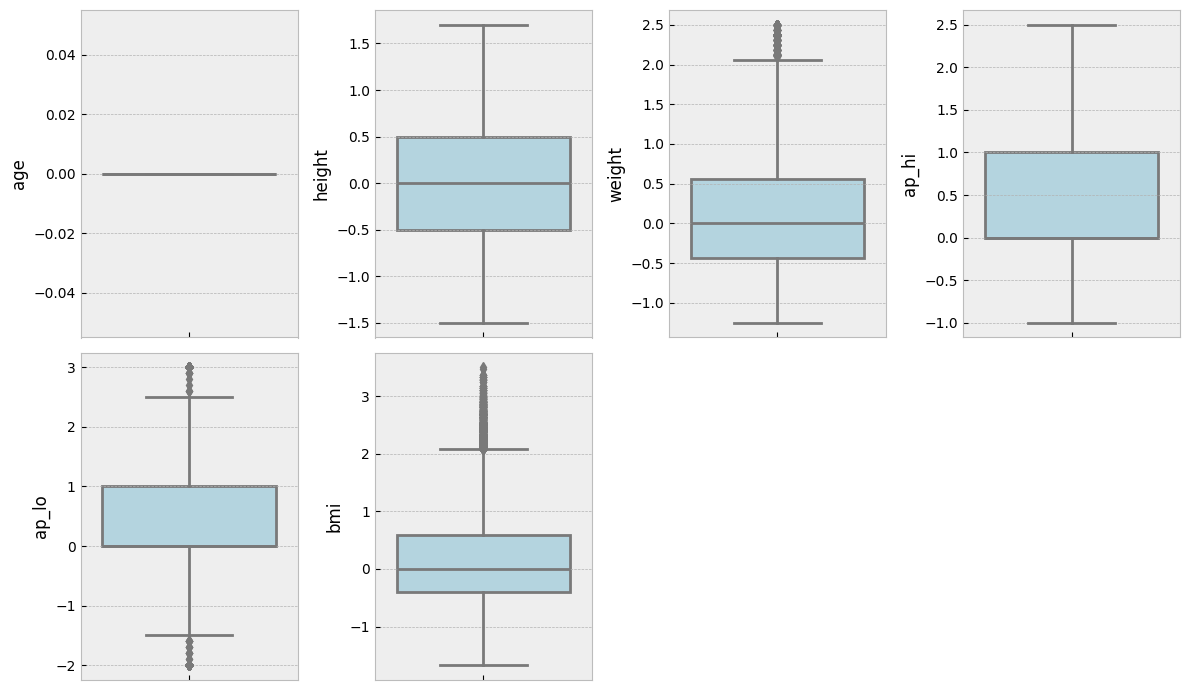

In [61]:
features_num = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

plt.figure(figsize=(12, 7))
for i, feature in enumerate(features_num):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=x_train[feature], color='lightblue', orient='v')
    
plt.tight_layout()
plt.show()

# Feature selection

In [62]:
#Usando Features Importancy

forest = en.ExtraTreesClassifier(n_estimators=350, random_state=0, n_jobs=12)

x_train_n = x_train
y_train_n = y_train.values

forest.fit (x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=350, n_jobs=12, random_state=0)

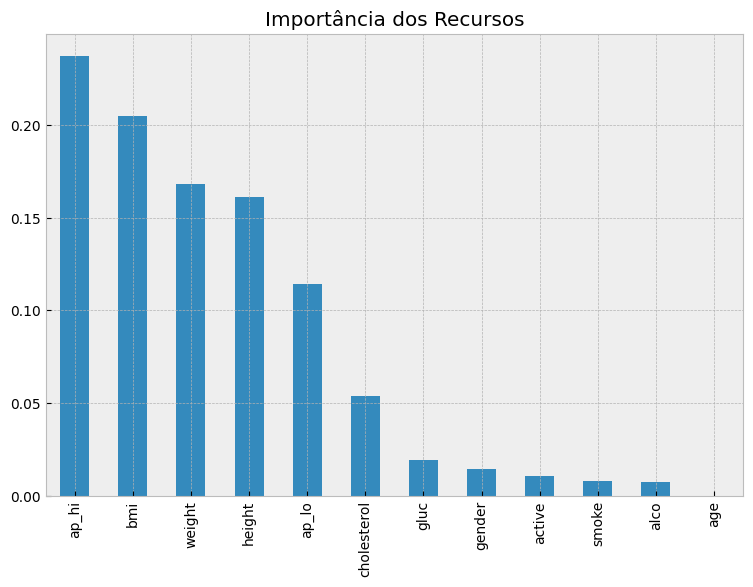

In [64]:
importances = forest.feature_importances_

feature_names = x_train_n.columns

# Convertendo as importâncias em uma série do pandas e associando os nomes dos recursos
importances_series = pd.Series(importances, index=feature_names)

# Ordenando as importâncias de forma decrescente
sorted_importances = importances_series.sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(9, 6))
sorted_importances.plot(kind='bar')
plt.title('Importância dos Recursos')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [183]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(46532, 12)
(15511, 12)
(46532,)
(15511,)


# Testando Modelos

In [65]:
#model definition - KNN Neighboors



knn_model = nh.KNeighborsClassifier(n_neighbors=25,  weights='uniform', n_jobs=12)

#model training
knn_model.fit(x_train, y_train)

#model prediction - poder de generalização 
yhat_knn = knn_model.predict(x_test)

accuracy = round(accuracy_score(y_test, yhat_knn), 4)
print(f'The accuracy of the KNN model is: {accuracy}')
##2.Confusion Matrix
conf_matrix = confusion_matrix(y_test, yhat_knn)
print(f'Confusion Matrix:\n{conf_matrix}')

##4.Precision
precision = round(precision_score(y_test, yhat_knn), 4)
print(f'The precision of the KNN model is:{precision}')

##5.Recall
recall = round(recall_score(y_test, yhat_knn), 4)
print(f'The recall of the KNN model is: {recall}')

##7.ROC-AUC score
y_pred_proba = knn_model.predict_proba(x_test)[:, 1]
roc_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
print(f'The ROC-AUC of the KNN model is: {roc_auc}')

metrics_lr = pd.DataFrame({
    'Metric' : ['Accuracy', 'Precision', 'Recall', 'ROC-AUC'],
    'Score' : [accuracy, precision, recall, roc_auc]
})
print(metrics_lr)




The accuracy of the KNN model is: 0.713
Confusion Matrix:
[[6177 1643]
 [2808 4883]]
The precision of the KNN model is:0.7482
The recall of the KNN model is: 0.6349
The ROC-AUC of the KNN model is: 0.7592
      Metric   Score
0   Accuracy  0.7130
1  Precision  0.7482
2     Recall  0.6349
3    ROC-AUC  0.7592


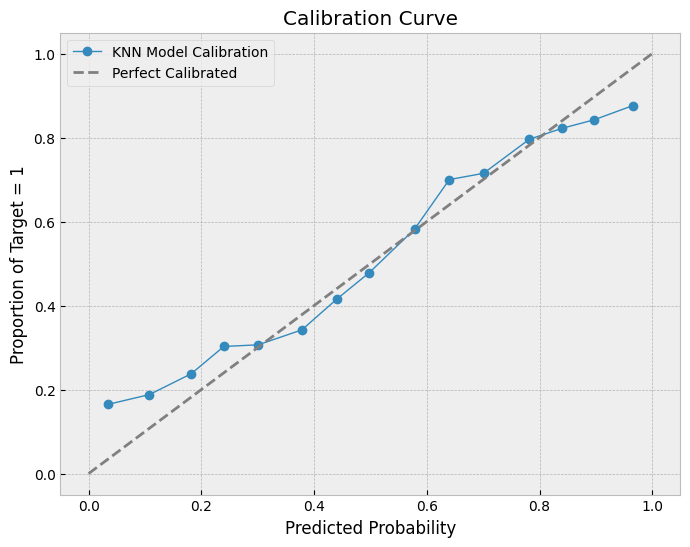

In [66]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=15, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='KNN Model Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Proportion of Target = 1')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
#model definition - Logistic Regression
log_regr = lm.LogisticRegression(max_iter=500)

#model training
log_regr.fit(x_train, y_train)

#model prediction - poder de generalização 
yhat_log_regr = log_regr.predict(x_test)

accuracy = round(accuracy_score(y_test, yhat_log_regr), 4)
print(f'The accuracy of the Logistic Regression model is: {accuracy}')
##2.Confusion Matrix
conf_matrix = confusion_matrix(y_test, yhat_log_regr)
print(f'Confusion Matrix:\n{conf_matrix}')

##4.Precision
precision = round(precision_score(y_test, yhat_log_regr), 4)
print(f'The precision of the Logistic Regression model is:{precision}')

##5.Recall
recall = round(recall_score(y_test, yhat_log_regr), 4)
print(f'The recall of the Logistic Regression model is: {recall}')

##7.ROC-AUC score
y_pred_proba = log_regr.predict_proba(x_test)[:, 1]
roc_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
print(f'The ROC-AUC of the Logistic Regression model is: {roc_auc}')

metrics_lr = pd.DataFrame({
    'Metric' : ['Accuracy', 'Precision', 'Recall', 'ROC-AUC'],
    'Score' : [accuracy, precision, recall, roc_auc]
})
print(metrics_lr)



The accuracy of the Logistic Regression model is: 0.7191
Confusion Matrix:
[[6223 1597]
 [2760 4931]]
The precision of the Logistic Regression model is:0.7554
The recall of the Logistic Regression model is: 0.6411
The ROC-AUC of the Logistic Regression model is: 0.7689
      Metric   Score
0   Accuracy  0.7191
1  Precision  0.7554
2     Recall  0.6411
3    ROC-AUC  0.7689


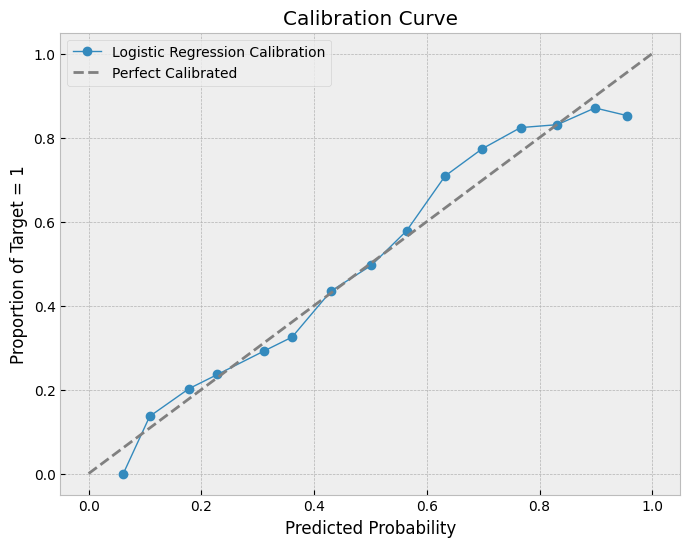

In [68]:
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=15, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Logistic Regression Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Proportion of Target = 1')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
#model definition - random Forest
random_forest = en.RandomForestClassifier(n_estimators=500, n_jobs=-1)

#model training
random_forest.fit(x_train, y_train)

#model prediction - poder de generalização 
yhat_random_forest = random_forest.predict(x_test)

accuracy = round(accuracy_score(y_test, yhat_random_forest), 4)
print(f'The accuracy of the Random Forest Classifier is: {accuracy}')

##2.Confusion Matrix
conf_matrix = confusion_matrix(y_test, yhat_random_forest)
print(f'The Confusion Matrix of the Random Forest Classifier is: {conf_matrix}')

##3.Classification Report
class_report = classification_report(y_test, yhat_random_forest)
print(f'The Classification Report of the Random Forest Classifier is:\n{class_report}')

##4.Precision
precision = round(precision_score(y_test, yhat_random_forest), 4)
print(f'The precision of the Random Forest Classifier is: {precision}')

##5.Recall
recall = round(recall_score(y_test, yhat_random_forest), 4)
print(f'The recall of the Random Forest Classifier is: {recall}')

##7.ROC-AUC score
y_pred_proba = random_forest.predict_proba(x_test)[:, 1]
roc_auc= round(roc_auc_score(y_test, y_pred_proba), 4)
print(f'The ROC-AUC of the Random Forest Classifier is: {roc_auc}')

##8.Metrics altogether
metrics_rf = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'ROC-AUC'],
    'Scores' : [accuracy, precision, recall, roc_auc]
})
print(metrics_rf)

The accuracy of the Random Forest Classifier is: 0.6818
The Confusion Matrix of the Random Forest Classifier is: [[5638 2182]
 [2753 4938]]
The Classification Report of the Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      7820
           1       0.69      0.64      0.67      7691

    accuracy                           0.68     15511
   macro avg       0.68      0.68      0.68     15511
weighted avg       0.68      0.68      0.68     15511

The precision of the Random Forest Classifier is: 0.6935
The recall of the Random Forest Classifier is: 0.642
The ROC-AUC of the Random Forest Classifier is: 0.7251
     Metrics  Scores
0   Accuracy  0.6818
1  Precision  0.6935
2     Recall  0.6420
3    ROC-AUC  0.7251


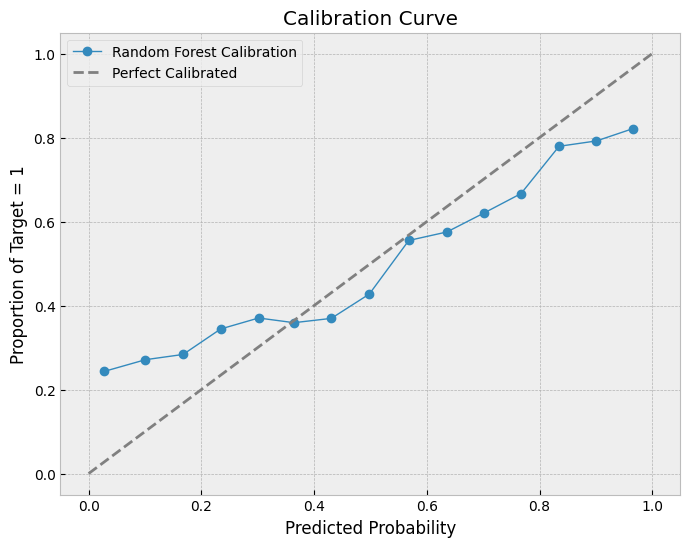

In [70]:
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=15, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Random Forest Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Proportion of Target = 1')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
#model definition - gradient boosting
gbc = en.GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

#model training
gbc.fit(x_train, y_train)

#model prediction - poder de generalização 
yhat_gbc = gbc.predict(x_test)

accuracy = round(accuracy_score(y_test, yhat_gbc), 4)
print(f'The accuracy of the Gradient Boosting Classifier is: {accuracy}')

##2.Confusion Matrix
conf_matrix = confusion_matrix(y_test, yhat_gbc)
print(f'The Confusion Matrix of the Gradient Boosting Classifier is: {conf_matrix}')

##3.Classification Report
class_report = classification_report(y_test, yhat_gbc)
print(f'The Classification Report of the Gradient Boosting Classifier is:\n{class_report}')

##4.Precision
precision = round(precision_score(y_test, yhat_gbc), 4)
print(f'The precision of the Gradient Boosting Classifier is: {precision}')

##5.Recall
recall = round(recall_score(y_test, yhat_gbc), 4)
print(f'The recall of the Gradient Boosting Classifier is: {recall}')

##7.ROC-AUC score
y_pred_proba = gbc.predict_proba(x_test)[:, 1]
roc_auc= round(roc_auc_score(y_test, y_pred_proba), 4)
print(f'The ROC-AUC of the Gradient Boosting Classifier is: {roc_auc}')

##8.Metrics altogether
metrics_rf = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'ROC-AUC'],
    'Scores' : [accuracy, precision, recall, roc_auc]
})
print(metrics_rf)

The accuracy of the Gradient Boosting Classifier is: 0.7221
The Confusion Matrix of the Gradient Boosting Classifier is: [[6234 1586]
 [2725 4966]]
The Classification Report of the Gradient Boosting Classifier is:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      7820
           1       0.76      0.65      0.70      7691

    accuracy                           0.72     15511
   macro avg       0.73      0.72      0.72     15511
weighted avg       0.73      0.72      0.72     15511

The precision of the Gradient Boosting Classifier is: 0.7579
The recall of the Gradient Boosting Classifier is: 0.6457
The ROC-AUC of the Gradient Boosting Classifier is: 0.7734
     Metrics  Scores
0   Accuracy  0.7221
1  Precision  0.7579
2     Recall  0.6457
3    ROC-AUC  0.7734


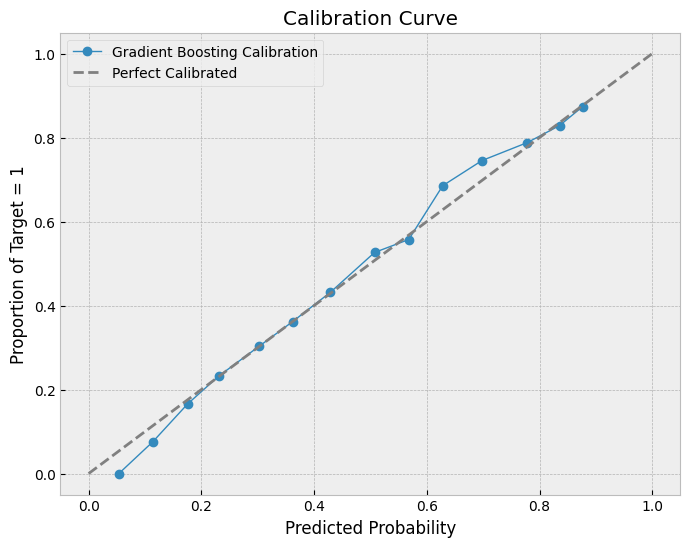

In [72]:
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=15, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Gradient Boosting Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Proportion of Target = 1')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
#fine tuning Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9]
}

gbc_model = en.GradientBoostingClassifier()
#model training
grid_search = GridSearchCV(estimator=gbc_model, param_grid=param_grid, cv=3, n_jobs=12, verbose=2, scoring='accuracy' )

grid_search.fit(x_train, y_train)

print('Melhores Parametros:' )
print(grid_search.best_params_)

#model prediction 
best_gbc = grid_search.best_estimator_

yhat_best_gbc = best_gbc.predict(x_test)

# Calculate accuracy
accuracy = round(accuracy_score(y_test, yhat_best_gbc), 4)
print(f'Accuracy of the tuned Grad Boosting Class model: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, yhat_best_gbc)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, yhat_best_gbc)
print(f'Classification Report:\n{class_report}')

# Calculate precision, recall, and F1-score
precision = round(precision_score(y_test, yhat_best_gbc), 4)
recall = round(recall_score(y_test, yhat_best_gbc), 4)
f1 = round(f1_score(y_test, yhat_best_gbc), 4)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

#Calculate ROC-AUC score
y_pred_proba = best_gbc.predict_proba(x_test)[:, 1]
roc_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
print(f'ROC-AUC: {roc_auc}')

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   1.4s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   1.4s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   1.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   2.7s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   2.3s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   2.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   2.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   5.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   5.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_e

In [75]:
gbc_model_tuned = en.GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=100)

gbc_model_tuned.fit(x_train, y_train)

#model prediction - poder de generalização 
yhat_gbc = gbc_model_tuned.predict(x_test)

accuracy = round(accuracy_score(y_test, yhat_gbc), 4)
print(f'The accuracy of the Gradient Boosting Classifier is: {accuracy}')

##2.Confusion Matrix
conf_matrix = confusion_matrix(y_test, yhat_gbc)
print(f'The Confusion Matrix of the Gradient Boosting Classifier is:\n {conf_matrix}')

##3.Classification Report
class_report = classification_report(y_test, yhat_gbc)
print(f'The Classification Report of the Gradient Boosting Classifier is:\n{class_report}')

##4.Precision
precision = round(precision_score(y_test, yhat_gbc), 4)

##5.Recall
recall = round(recall_score(y_test, yhat_gbc), 4)

##7.ROC-AUC score
y_pred_proba = gbc_model_tuned.predict_proba(x_test)[:, 1]
roc_auc= round(roc_auc_score(y_test, y_pred_proba), 4)

##8.Metrics altogether
metrics_rf = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'ROC-AUC'],
    'Scores' : [accuracy, precision, recall, roc_auc]
})
print(metrics_rf)


The accuracy of the Gradient Boosting Classifier is: 0.7218
The Confusion Matrix of the Gradient Boosting Classifier is:
 [[6231 1589]
 [2726 4965]]
The Classification Report of the Gradient Boosting Classifier is:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      7820
           1       0.76      0.65      0.70      7691

    accuracy                           0.72     15511
   macro avg       0.73      0.72      0.72     15511
weighted avg       0.73      0.72      0.72     15511

     Metrics  Scores
0   Accuracy  0.7218
1  Precision  0.7576
2     Recall  0.6456
3    ROC-AUC  0.7732


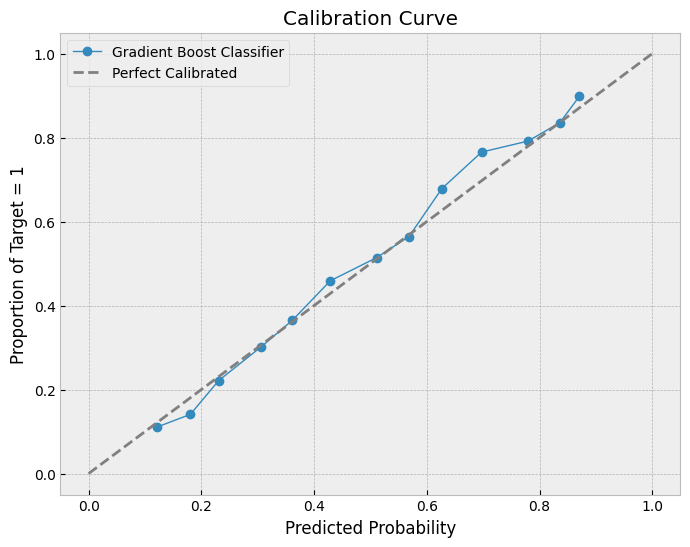

In [76]:
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=15, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Gradient Boost Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Proportion of Target = 1')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

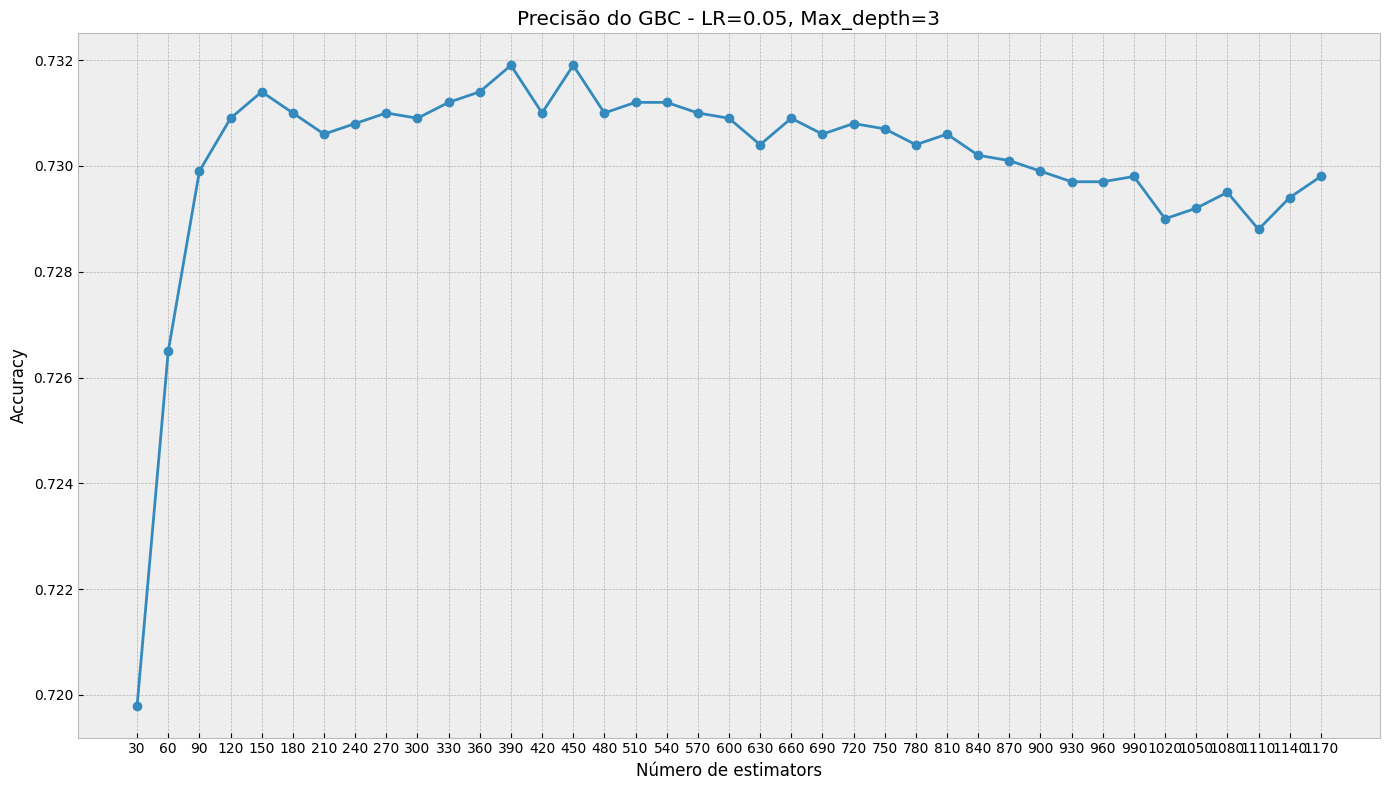

In [ ]:
#Fine tuning for KNN
n_estimators = range(30, 1200, 30)
accuracies = []
for estimators in n_estimators:

    gbc_fine = en.GradientBoostingClassifier(n_estimators=estimators,learning_rate=0.05, max_depth=3)

    #model training
    gbc_fine.fit(x_train, y_train)

    #model prediction - poder de generalização 
    yhat_fine = gbc_fine.predict(x_test)

    accuracy = round(accuracy_score(y_test, yhat_fine), 4)
    accuracies.append(accuracy)
plt.figure(figsize=(14, 8))
plt.plot(n_estimators, accuracies, marker='o')
plt.title('Acurácia do GBC - LR=0.05, Max_depth=3')
plt.xlabel('Número de estimators')
plt.ylabel('Accuracy')
plt.xticks(np.arange(30, 1200, 30))  # Ajusta os ticks no eixo x
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# #Fine tuning for KNN
# n_neighbors = range(27, 75)
# accuracies = []
# for neighbors in n_neighbors:

#     knn_model = nh.KNeighborsClassifier(n_neighbors=neighbors, weights='distance', n_jobs=12)

#     #model training
#     knn_model.fit(x_train, y_train)

#     #model prediction - poder de generalização 
#     yhat_knn = knn_model.predict(x_test)

#     accuracy = round(accuracy_score(y_test, yhat_knn), 4)
#     accuracies.append(accuracy)
# plt.figure(figsize=(14, 8))
# plt.plot(n_neighbors, accuracies, marker='o')
# plt.title('Precisão do KNN - Weights: Distance')
# plt.xlabel('Número de vizinhos')
# plt.ylabel('Precisão')
# plt.xticks(np.arange(27, 75, 1))  # Ajusta os ticks no eixo x
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# knn_model = nh.KNeighborsClassifier(n_neighbors=62, weights='distance', n_jobs=12)

# #model training
# knn_model.fit(x_train, y_train)

# #model prediction 
# yhat_knn = knn_model.predict(x_test)

# # Calculate accuracy
# accuracy = round(accuracy_score(y_test, yhat_knn), 4)
# print(f'Accuracy of the tuned KNN model: {accuracy}')

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, yhat_knn)
# print(f'Confusion Matrix:\n{conf_matrix}')

# # Classification Report
# class_report = classification_report(y_test, yhat_knn)
# print(f'Classification Report:\n{class_report}')

# # Calculate precision, recall, and F1-score
# precision = round(precision_score(y_test, yhat_knn), 4)
# recall = round(recall_score(y_test, yhat_knn), 4)
# f1 = round(f1_score(y_test, yhat_knn), 4)
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1-score: {f1}')

# #Calculate ROC-AUC score
# y_pred_proba = knn_model.predict_proba(x_test)[:, 1]
# roc_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
# print(f'ROC-AUC: {roc_auc}')


In [ ]:
# prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=14, strategy='uniform')

# plt.figure(figsize=(8, 6))
# plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='KNN Calibration')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibrated')

# plt.xlabel('Predicted Probability')
# plt.ylabel('Proportion of Target = 1')
# plt.title('Calibration Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

In [77]:
#Avaliando o desempenho numa cross-validation com 5 folds
gbc_fine_tuned = en.GradientBoostingClassifier(n_estimators=100,learning_rate=0.05, max_depth=3)
scores = cross_val_score(gbc_fine_tuned, x_train, y_train, cv=5)

print("Resultados de cada fold:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# Calculando e exibindo a média dos resultados
mean_accuracy = scores.mean()
print("\nAccuracy média:", mean_accuracy)

Resultados de cada fold:
Fold 1: 0.7204254861931879
Fold 2: 0.7211776082518534
Fold 3: 0.7243713733075435
Fold 4: 0.7259832366215345
Fold 5: 0.7196432409198367

Accuracy média: 0.7223201890587913


In [91]:
df3 = df.copy()

# dropando a coluna target ('cardio') e o id que não representa importância ao modelo.
x = df3.drop(['cardio'], axis=1)

# y será apenas o target
y = df3['cardio']

In [83]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,0,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,0,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,0,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,0,1,156,56.0,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,0,1,172,70.0,130,90,1,1,0,0,1,23.661439
69994,0,1,165,80.0,150,80,1,1,0,0,1,29.384757
69995,0,2,168,76.0,120,80,1,1,1,0,1,26.927438
69998,0,1,163,72.0,135,80,1,2,0,0,0,27.099251


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2,random_state=1 )



## Testando desempenho frente a x_val e y_val

In [100]:

#model training
gbc_fine_tuned.fit(x_train, y_train)

#model prediction 
yhat_gbc = gbc_fine_tuned.predict(x_val)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, yhat_gbc)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_val, yhat_gbc)
print(f'Classification Report:\n{class_report}')

# Calculate precision, recall, and F1-score
accuracy = round(accuracy_score(y_val, yhat_gbc), 4)
precision = round(precision_score(y_val, yhat_gbc), 4)
recall = round(recall_score(y_val, yhat_gbc), 4)
f1 = round(f1_score(y_val, yhat_gbc), 4)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

#Calculate ROC-AUC score
y_pred_proba = gbc_fine_tuned.predict_proba(x_val)[:, 1]
roc_auc = round(roc_auc_score(y_val, y_pred_proba), 4)
print(f'ROC-AUC: {roc_auc}')


Confusion Matrix:
[[3737  951]
 [1594 3025]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      4688
           1       0.76      0.65      0.70      4619

    accuracy                           0.73      9307
   macro avg       0.73      0.73      0.72      9307
weighted avg       0.73      0.73      0.73      9307

Accuracy: 0.7265
Precision: 0.7608
Recall: 0.6549
F1-score: 0.7039
ROC-AUC: 0.7787


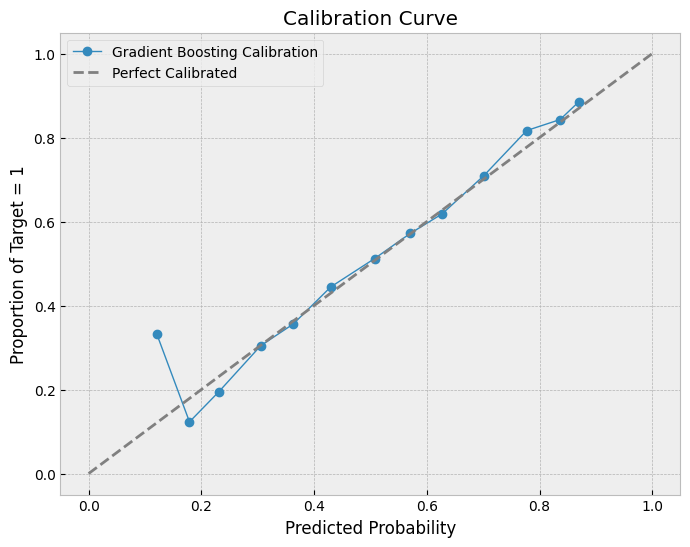

In [101]:
prob_true, prob_pred = calibration_curve(y_val, y_pred_proba, n_bins=15, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Gradient Boosting Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Proportion of Target = 1')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

## testando o mesmo modelo frente a número que ele nunca viu, x_test, y_test.

In [102]:
gbc_fine_tuned.fit(x_train, y_train)

#model prediction 
yhat_gbc = gbc_fine_tuned.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, yhat_gbc)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, yhat_gbc)
print(f'Classification Report:\n{class_report}')

# Calculate precision, recall, and F1-score
accuracy = round(accuracy_score(y_test, yhat_gbc), 4)
precision = round(precision_score(y_test, yhat_gbc), 4)
recall = round(recall_score(y_test, yhat_gbc), 4)
f1 = round(f1_score(y_test, yhat_gbc), 4)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

#Calculate ROC-AUC score
y_pred_proba = gbc_fine_tuned.predict_proba(x_test)[:, 1]
roc_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
print(f'ROC-AUC: {roc_auc}')

Confusion Matrix:
[[6228 1592]
 [2728 4963]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      7820
           1       0.76      0.65      0.70      7691

    accuracy                           0.72     15511
   macro avg       0.73      0.72      0.72     15511
weighted avg       0.73      0.72      0.72     15511

Accuracy: 0.7215
Precision: 0.7571
Recall: 0.6453
F1-score: 0.6968
ROC-AUC: 0.7726


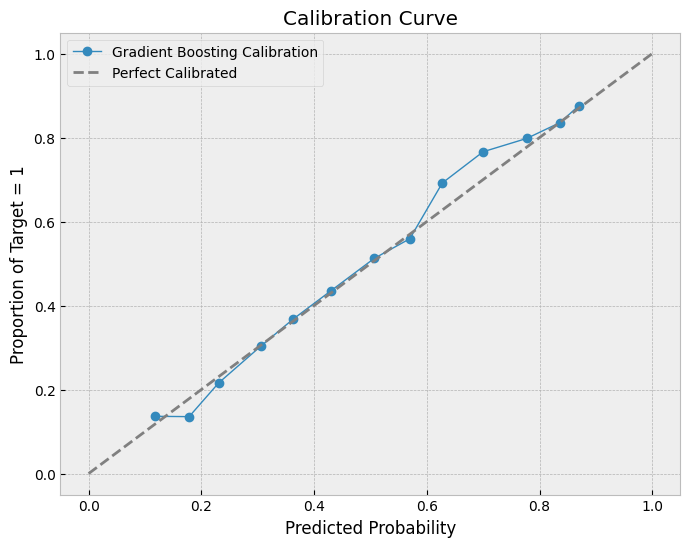

In [103]:
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=15, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Gradient Boosting Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Proportion of Target = 1')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

## Exportando o modelo treinado no formato Pickle

In [ ]:
model_filename = '../models/grad_boost.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(gbc_fine_tuned, file)

In [ ]:
import joblib
model = joblib.load('grad_boost.pkl')

In [ ]:
age = 35
gender = 1
height = 170
weight = 60
ap_hi = 120
ap_lo = 100
cholesterol = 1
gluc = 1
smoke = 0
alco = 0
active = 1
bmi = weight/(height/100)**2

input_values = np.array([age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, bmi])

# Rescaling usando Robust Scaler
scaler = RobustScaler()
input_values_reshaped = input_values.reshape(1, -1)

input_values_scaled = scaler.fit_transform(input_values_reshaped)


feature_names = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']
predic_proba = model.predict_proba(input_values_reshaped)


/home/junicoletti/.pyenv/versions/3.11.8/envs/cardio_disease_ds/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(predic_proba)

[[0.81520427 0.18479573]]
